In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Tensorflow:- It is a framework that supports high and low level API.
# train_test_split:- It is used to split dta into trianing and testing sets. It splits the data
# After randomly shuffling it.It ensures the uniform distribution of data.
# LabelEncoder:- It helps in encoding categorical labels(text fotmat) into numeric values.
# It assigns an integer to each catagory in data. example type of attack is benign and malicous.
# values assigned to these categories is benign-1, malicious-0.
# Min Max Scalar:- It transforms the data by scaling each feature to a range
# typically btw 0 and 1.
# Standard scalar:- It transform the data by scaling the features to have mean of 0
# and standard deviation of 1.


In [2]:
# Loading the dataset:-
ds = pd.read_csv('/content/sample_data/Combined.csv', low_memory=False)
ds.head()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [3]:
ds.tail()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
15383,15383,3772,0.0,0.0,0.0,0.0,0.0,0.0,tcp,0.0,...,NaN,NaN,1.899316e+09,NaN,0.0,0.0,0.0,Malicious,TCPConnectScan,Nmap
15384,15384,3773,0.0,0.0,0.0,0.0,0.0,0.0,tcp,0.0,...,NaN,NaN,2.249609e+09,NaN,0.0,0.0,0.0,Malicious,TCPConnectScan,Nmap
15385,15385,3774,0.0,0.0,0.0,0.0,0.0,0.0,tcp,0.0,...,NaN,NaN,2.995715e+09,NaN,0.0,0.0,0.0,Malicious,TCPConnectScan,Nmap
15386,15386,3775,0.0,0.0,0.0,0.0,0.0,0.0,tcp,0.0,...,NaN,NaN,2.919155e+09,NaN,0.0,0.0,0.0,Malicious,TCPConnectScan,Nmap
15387,15387,3776,0.0,0.0,0.0,0.0,0.0,0.0,tcp,0.0,...,NaN,NaN,5.280230e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
column_name = 'Attack Type'
common_items_count = ds[column_name].value_counts()
common_items_count

SYNScan           10019
TCPConnectScan     3602
Benign             1766
Name: Attack Type, dtype: int64

In [5]:
ds.describe()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat
count,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15387.000000,1160.000000,...,15388.000000,1.371500e+04,1.430000e+02,75.0,40.0,1.371500e+04,1.170000e+02,15387.000000,15387.000000,15387.000000
mean,7693.500000,4223.106772,0.163754,0.163754,0.163754,0.163754,0.163754,0.163754,0.927016,14.458621,...,1.325677,1.343302e+05,5.999748e+05,610.0,610.0,1.272634e+09,1.566142e+09,0.000099,0.000026,0.000074
std,4442.277306,3190.571964,0.868535,0.868535,0.868535,0.868535,0.868535,0.868535,12.637989,48.796703,...,7.594373,8.972167e+05,2.130041e+06,0.0,0.0,9.541641e+08,1.228008e+09,0.002651,0.001596,0.001510
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,610.0,610.0,5.928700e+05,8.554358e+06,0.000000,0.000000,0.000000
25%,3846.750000,1521.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,2.655000e+02,610.0,610.0,8.675724e+08,4.395904e+08,0.000000,0.000000,0.000000
50%,7693.500000,3421.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,8.510000e+02,610.0,610.0,1.092168e+09,1.056604e+09,0.000000,0.000000,0.000000
75%,11540.250000,6892.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,3.110400e+04,610.0,610.0,1.668724e+09,2.446252e+09,0.000000,0.000000,0.000000
max,15387.000000,10720.000000,4.999991,4.999991,4.999991,4.999991,4.999991,4.999991,224.000000,186.000000,...,134.300293,8.379648e+06,8.340480e+06,610.0,610.0,4.294967e+09,4.248482e+09,0.194062,0.139067,0.090771


In [6]:
# Dropping any missing values:-
ds = ds.dropna()

In [8]:
# Separate features (X) and labels (Y)
X = ds.drop(['Label', 'Attack Type', 'Attack Tool'], axis=1)

# Perform one-hot encoding for categorical columns
cat_cols = ['Proto', 'Cause', 'State']
X = pd.get_dummies(X, columns=cat_cols)

In [9]:
# Checking for any duplicate values:-
print(ds.duplicated().sum())
# dropping any duplicate values:-
ds = ds.drop_duplicates()
print(ds.shape)
print(ds.head())

# Duplicate function():- checks for redundent rows and returns boolean series either Ture or Flase.
# Drop_dulicates:- It drops the duplicate rows.
# Sum():- it counts the Duplicate rows present and gives total counts.

0
(0, 52)
Empty DataFrame
Columns: [Unnamed: 0, Seq, Dur, RunTime, Mean, Sum, Min, Max, Proto, sTos, dTos, sDSb, dDSb, sTtl, dTtl, sHops, dHops, Cause, TotPkts, SrcPkts, DstPkts, TotBytes, SrcBytes, DstBytes, Offset, sMeanPktSz, dMeanPktSz, Load, SrcLoad, DstLoad, Loss, SrcLoss, DstLoss, pLoss, SrcGap, DstGap, Rate, SrcRate, DstRate, State, SrcWin, DstWin, sVid, dVid, SrcTCPBase, DstTCPBase, TcpRtt, SynAck, AckDat, Label, Attack Type, Attack Tool]
Index: []

[0 rows x 52 columns]


In [10]:
# Converting any categorical columns into numerical ones using one-hot encoding:-
# cat_col = ['Proto','Cause','State']
# X = pd.get_dummies(X, columns = cat_col)

# pd.get_dummies():- convert categorical variables into dummy variables.
# X is the feature columns and cat_col is the provided columns to be one-hot encoded.
# It assignes the binary coluns and asigns each columns with values either 0 or 1.
# These values indicates the presence or absence of the features in the columns.
# for example in protocol columns it has 3 categories:- icmp, ud, tcp,
# so the function will create 3 binary columns and assign each catagory with either
# value 1 for presence of that catagory and 0 for absence of that catagory.


KeyError: ignored

In [11]:
# Feature Scaling:-
columns_to_scale = ['Seq','Dur','Mean','Sum','TotPkts','SrcPkts','DstPkts',
                    'TotBytes','SrcBytes','DstBytes','Offset','sMeanPktSz',
                    'dMeanPktSz','Load','SrcLoad','DstLoad','Loss','SrcLoss',
                    'DstLoss','pLoss','Rate','SrcRate','DstRate','SrcGap','DstGap',
                    'sTtl','dTtl'
                    ]
numeric_data = ds[columns_to_scale]
# Min Max Scaling:-
min_max_scaling = MinMaxScaler()
# Applying Z-Score Normalization:-
standard_scaling = StandardScaler()
standard_scaled_data = standard_scaling.fit_transform(numeric_data)
standard_scaled_data = pd.DataFrame(standard_scaled_data, columns = columns_to_scale)

# min max scaling is a feature extracting technique.
# It scales the data into specified range, usually btw. 0 and 1.
# Standard scaler is also a feature scaling technique.
# It standarizes the data by transforming it to have a mean of 0 and a standard
# deviation of 1.
# Z-Score normalization:-
#c alculates the mean and standard deviation of each column in 'numeric_data'
# and then applies the standardization formula to each value.

ValueError: ignored

In [ ]:
# Perform ANOVA feature selection
num_features_to_select = 10  # Choose the number of top features to select
anova_selector = SelectKBest(f_classif, k=num_features_to_select)
numeric_data_selected = anova_selector.fit_transform(numeric_data, Y)

# Convert selected features to a DataFrame
selected_feature_indices = anova_selector.get_support(indices=True)
selected_feature_names = numeric_data.columns[selected_feature_indices]
numeric_data_selected_df = pd.DataFrame(numeric_data_selected, columns=selected_feature_names)

In [ ]:
# Converting dataframe to numpy array:-
X = X.to_numpy()

In [ ]:
# Converting labels to numerical values:-
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Label Encoder first fits the encoder to the data  to learn the mapping
# between unique labels and numerical values, and then it transforms the labels
# to their corresponding numerical representation.
# During the fitting process, the labelencoder identifies all unique labels in
# and assigns a unique integer to each label.
# The transformation process replaces each label in Y with its corresponding integer
# representation.

In [ ]:
# Converting target labels to one-hot encoding;-
numerical_classes = len(label_encoder.classes_)
Y = tf.keras.utils.to_categorical(Y, numerical_classes)

# calculates the number of unique classes in the target variable Y
# after it has been encoded.
# The label_encoder.classes_ attribute contains the unique classes that were encountered
# during the label encoding process.
# len(label_encoder.classes_) gives us the total count of unique classes.
# This line applies one-hot encoding (one-of-K encoding) to the numerical
# encoded target variable Y.
# The to_categorical() function is used for this purpose.

# This function converts a class vector Y to a one-hot encoded matrix.
# In the one-hot encoded matrix, each row corresponds to a sample, and each column corresponds to a unique class from the target variable.
# The value in the matrix is 1 if the corresponding sample belongs to that class,
# or 0 otherwise.

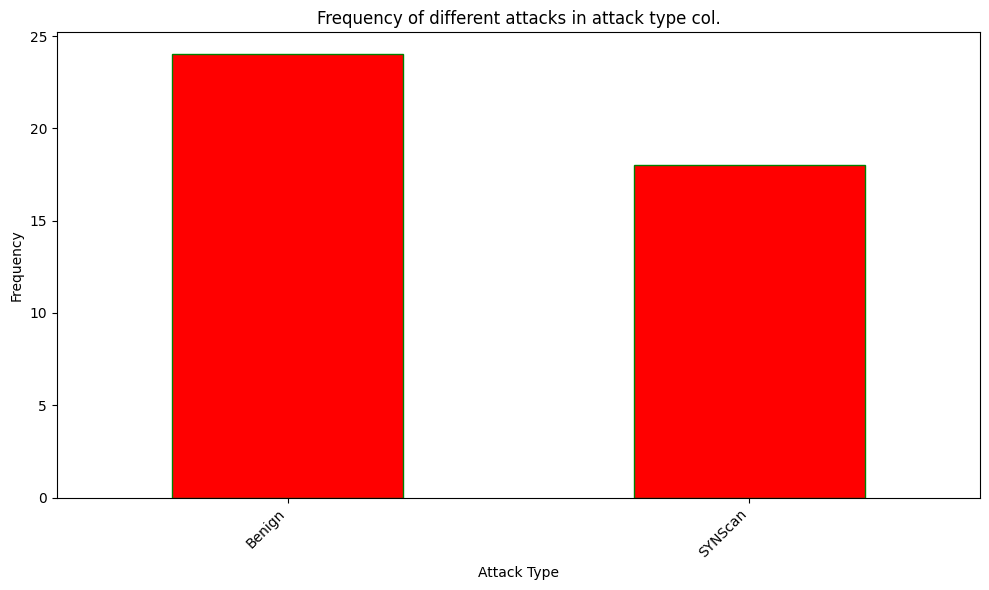

In [ ]:
# Understanding the frequencies of attacks:-
attack_types_counts = ds['Attack Type'].value_counts()
plt.figure(figsize = (10, 6))
attack_types_counts.plot(kind = 'bar', color = 'red', edgecolor = 'green')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.title('Frequency of different attacks in attack type col.')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

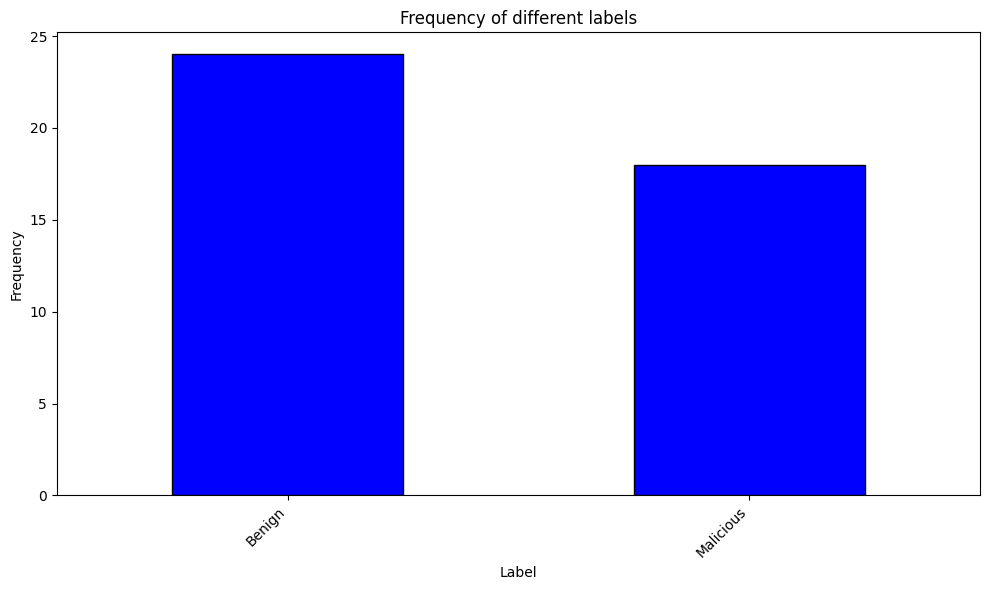

In [ ]:
# Understanding the frequencies of labels:-
attack_types_counts = ds['Label'].value_counts()
plt.figure(figsize = (10, 6))
attack_types_counts.plot(kind = 'bar', color = 'blue', edgecolor = 'black')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of different labels')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [ ]:
# Splitting dataset into training and testing part:-
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size = 0.3,
    random_state = 42
)

# Random state is used to seed the random number generator.
# Providing a specific value for random state ensures that the data split remains consistent
# each time the code is run.
# This helps in reproducibility, as the same random data points will be assigned to the training and testing sets
# whenever the code is executed with the same random_state value.

In [ ]:
 # Reshaping input data for our RNN(assuming that the dataset hai 1-D sequences):-
input_shape = (X_train.shape[1],1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# is a tuple that defines the shape of the input data for the RNN.
# The first element of the tuple, X_train.shape[1],
# represents the number of time steps in each sequence, and the second element, 1, represents the number of input features
# at each time step. In this case, it indicates that each sequence in the dataset is 1-dimensional.

# X_train.shape[0]:- The first dimension of 'X_train' represents the number of samples in the training set (i.e., the batch size). X_train.shape[0] gives us the number of samples.

# X_train.shape[1]:- The second dimension of 'X_train' represents the number of time steps in each sequence. In this step, we want to transform each sample from a 2-dimensional sequence to a 3-dimensional sequence with one feature at each time step.

# X_train.reshape(X_train.shape[0], X_train.shape[1], 1):- This function call reshapes 'X_train' into a 3-dimensional array with shape (batch_size, time_steps, input_features). Here, the number of input features is set to 1, as we previously defined in the 'input_shape' tuple.

# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1):
# Similarly, this line reshapes the testing data 'X_test' to have the same 3-dimensional format as the training data. It ensures that the RNN can process the testing data in the same sequence format as the training data.

In [ ]:
# Building our RNN Model:-
rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape = input_shape),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(numerical_classes, activation = 'softmax')
])

# Model compilation:-
rnn_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['Accuracy']
                  )

#tf.keras.layers.LSTM(64, input_shape=input_shape):-
#This is the Long Short-Term Memory (LSTM) layer, a type of RNN cell that is particularly effective at capturing long-term dependencies in sequential data. The LSTM layer has 64 units (or cells), which determines the dimensionality of the hidden state.

#64:- This is the number of LSTM units in the layer. It represents the dimensionality of the LSTM's internal representation, also known as the hidden state. More units allow the model to learn more complex patterns, but they also increase the number of parameters and training time.

#input_shape: This specifies the shape of the input data that will be fed into the model. It should be in the format (time_steps, input_features). In this case, the input_shape is derived from the variable defined earlier, representing the number of time steps and input features in the data.

#b. tf.keras.layers.Dense(128, activation='relu'):
#This is a fully connected (dense) layer with 128 units and the ReLU activation function. Dense layers are used for learning high-level abstractions from the output of the previous LSTM layer. The ReLU activation function introduces non-linearity, which allows the model to learn complex relationships in the data.

#c. tf.keras.layers.Dense(numerical_classes, activation='softmax'):
#This is the output layer of the model with numerical_classes units and the softmax activation function. The number of units in this layer corresponds to the number of classes in the target variable ('Y'). The softmax activation function produces a probability distribution over the classes, allowing the model to make multiclass predictions.

#Model Compilation:
#After building the model, the next step is to compile it. During compilation, we specify the loss function, the optimizer, and the metrics to be used during training.

#a. loss='categorical_crossentropy':
#This is the loss function used for categorical multiclass classification problems. Since the target variable 'Y' has been one-hot encoded, categorical cross-entropy is an appropriate choice for the loss function.

#b. optimizer='adam':
#The Adam optimizer is chosen as the optimization algorithm. Adam is a popular and effective optimization algorithm that adapts the learning rate during training.

#c. metrics=['Accuracy']:
#The metric used to monitor the model's performance during training is accuracy. Accuracy measures the proportion of correct predictions made by the model over the total number of predictions.


In [ ]:
# Training rnn model:-
epochs = 200
batch_size = 128
history = rnn_model.fit(X_train,
                        Y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        validation_split = 0.3
                        )


Epoch 1/200
1/1 [==============================] - 12s 12s/step - loss: 0.6648 - Accuracy: 0.6000 - val_loss: 0.6947 - val_Accuracy: 0.4444
Epoch 2/200
1/1 [==============================] - 0s 39ms/step - loss: 0.6296 - Accuracy: 0.6000 - val_loss: 0.6806 - val_Accuracy: 0.4444
Epoch 3/200
1/1 [==============================] - 0s 37ms/step - loss: 0.6032 - Accuracy: 0.6000 - val_loss: 0.6552 - val_Accuracy: 0.4444
Epoch 4/200
1/1 [==============================] - 0s 41ms/step - loss: 0.5795 - Accuracy: 0.6000 - val_loss: 0.6154 - val_Accuracy: 0.4444
Epoch 5/200
1/1 [==============================] - 0s 37ms/step - loss: 0.5517 - Accuracy: 0.6000 - val_loss: 0.5756 - val_Accuracy: 0.7778
Epoch 6/200
1/1 [==============================] - 0s 38ms/step - loss: 0.5253 - Accuracy: 0.8500 - val_loss: 0.5454 - val_Accuracy: 0.7778
Epoch 7/200
1/1 [==============================] - 0s 37ms/step - loss: 0.5019 - Accuracy: 0.8000 - val_loss: 0.5151 - val_Accuracy: 0.7778
Epoch 8/200
1/1 [===

In [ ]:
# Model evaluation:-
loss, accuracy = rnn_model.evaluate(X_test, Y_test, batch_size = batch_size)
print(f'Test loss is: {loss:.4f}, Test accuracy is: {accuracy:.4f}')

1/1 [==============================] - 0s 27ms/step - loss: 1.6840e-04 - Accuracy: 1.0000
Test loss is: 0.0002, Test accuracy is: 1.0000


In [ ]:
# making predictions:-
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_test_classes = np.argmax(Y_test, axis = 1)
print(y_pred_classes)
print()
print(y_test_classes)


#y_pred = rnn_model.predict(X_test):
#This line uses the trained RNN model (rnn_model) to make predictions on the test data (X_test). The predict() method of the model is used to obtain the predicted probabilities for each class for each sample in the test data. The variable y_pred will now hold a 2-dimensional array, where each row represents a sample from the test data, and each column contains the predicted probabilities for each class.

#y_pred_classes = np.argmax(y_pred, axis=1):
#The np.argmax() function is used to convert the predicted probabilities (y_pred) into class labels (y_pred_classes). It performs this conversion by finding the index of the maximum probability along each row (axis 1) of the y_pred array. This index corresponds to the class with the highest predicted probability for each sample. So, y_pred_classes will be a 1-dimensional array containing the predicted class labels for each sample in the test data.

#y_test_classes = np.argmax(Y_test, axis=1):
#Similar to the previous step, this line uses the np.argmax() function to convert the one-hot encoded ground truth labels (Y_test) into their corresponding class labels (y_test_classes). The axis=1 parameter specifies that the maximum value is to be found along the second axis (columns) of the Y_test array. This step is necessary because the original labels were one-hot encoded, and we need to convert them back to their numerical class representation.

#print(y_pred_classes):
#This line prints the predicted class labels for each sample in the test data. The y_pred_classes array will contain the class labels predicted by the model for each test sample.

#print():
#This line prints an empty line, creating a separation between the two arrays printed for clarity.

#print(y_test_classes):
#This line prints the ground truth class labels for each sample in the test data. The y_test_classes array will contain the actual class labels for each test sample.


1/1 [==============================] - 0s 359ms/step
[0 0 0 0 1 1 1 0 0 1 0 0 1]

[0 0 0 0 1 1 1 0 0 1 0 0 1]


In [ ]:
# Converting prediction labels into original labels:-
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test_classes)
print('testing labels are: ',y_test_labels)
print()
print('predicted labels are: ',y_pred_labels)
print()



# y_pred_labels = label_encoder.inverse_transform(y_pred_classes):
#The inverse_transform() method of the LabelEncoder object (label_encoder) is used to convert the numerical class labels (y_pred_classes) back into their original categorical labels (y_pred_labels). This method reverses the encoding process performed earlier when the labels were converted into numerical representations.
#label_encoder: This is the LabelEncoder object used earlier to encode the categorical labels into numerical values.

#y_pred_classes: This is the array containing the predicted class labels (numerical representations) obtained from the RNN model's predictions on the test data.

#The inverse_transform() method maps the numerical labels in y_pred_classes back to their original categorical labels, producing an array (y_pred_labels) with the same shape as y_pred_classes but with the categorical class labels for each sample.

#y_test_labels = label_encoder.inverse_transform(y_test_classes):
#Similar to the previous step, this line uses the inverse_transform() method of the LabelEncoder object (label_encoder) to convert the numerical ground truth class labels (y_test_classes) back into their original categorical labels (y_test_labels).
#label_encoder: The same LabelEncoder object used throughout the code.

#y_test_classes: This is the array containing the ground truth class labels (numerical representations) derived from the original one-hot encoded ground truth labels (Y_test).

#The inverse_transform() method maps the numerical labels in y_test_classes back to their original categorical labels, producing an array (y_test_labels) with the same shape as y_test_classes but with the categorical class labels for each sample.

#print(y_pred_labels):
#This line prints the predicted categorical labels (y_pred_labels) for each sample in the test data. The y_pred_labels array will contain the predicted class labels as strings, representing the RNN model's predicted class for each test sample.

#print():
#This line prints an empty line, creating a separation between the two arrays printed for clarity.

#print(y_test_labels):
#This line prints the ground truth categorical labels (y_test_labels) for each sample in the test data. The y_test_labels array will contain the actual class labels for each test sample, representing the true labels of the data.


testing labels are:  ['Benign' 'Benign' 'Benign' 'Benign' 'Malicious' 'Malicious' 'Malicious'
 'Benign' 'Benign' 'Malicious' 'Benign' 'Benign' 'Malicious']

predicted labels are:  ['Benign' 'Benign' 'Benign' 'Benign' 'Malicious' 'Malicious' 'Malicious'
 'Benign' 'Benign' 'Malicious' 'Benign' 'Benign' 'Malicious']



In [ ]:
# Calculating accuracy:-
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy is: {accuracy:.4f}')

Accuracy is: 1.0000


In [ ]:
# Classification report and confusion matrix:-
classification_rep = classification_report(y_test_labels, y_pred_labels)
print('Classification report is:-')
print()
print(classification_rep)
print()

confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)
print('Confusion matrix is:-')
print()
print(confusion_mat)

Classification report is:-

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00         8
   Malicious       1.00      1.00      1.00         5

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13


Confusion matrix is:-

[[8 0]
 [0 5]]
